In [1]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily

In [2]:
ct = "Connecticut, USA"
ct_NewH = ['New Haven County, Connecticut, USA']
ct_Mids = ['Middlesex County, Connecticut, USA']
ct_Tola = ['Tolland County, Connecticut, USA']
ct_Hart = ['Hartford County, Connecticut, USA']
ct_Fair = ['Fairfield County, Connecticut, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
        
lyme = ['Lyme, Connecticut, USA']
Oldlyme = ['Old Lyme, Connecticut, USA']
Colchester = ['Colchester, Connecticut, USA']
NewMilford = ['New Milford, Connecticut, USA']
Bridgewater = ['Bridgewater, Connecticut, USA']
        
desired_building_types = ['school', 'commercial', 'retail','office','garage','hotel','church','train_station','dormitory',
                          'mosque','warehouse','stadium','clubhouse','chapel','fire_station','university','kindergarten',
                         'service','construction','hospital','plant_nursery','greenhouse','public','government','farm_auxiliary',
                         'farm','boathouse','sports_centre','dome','hangar','kiosk','college','napa auto parts','cathedral',
                         'synagogue','library','museum','convent','store','yes;commercial','university;yes','supermarket','parish_hall',
                          'motel','roof;commercial']


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_15072\3387604212.py:7: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(ct_counties, tags={'building': desired_building_types})


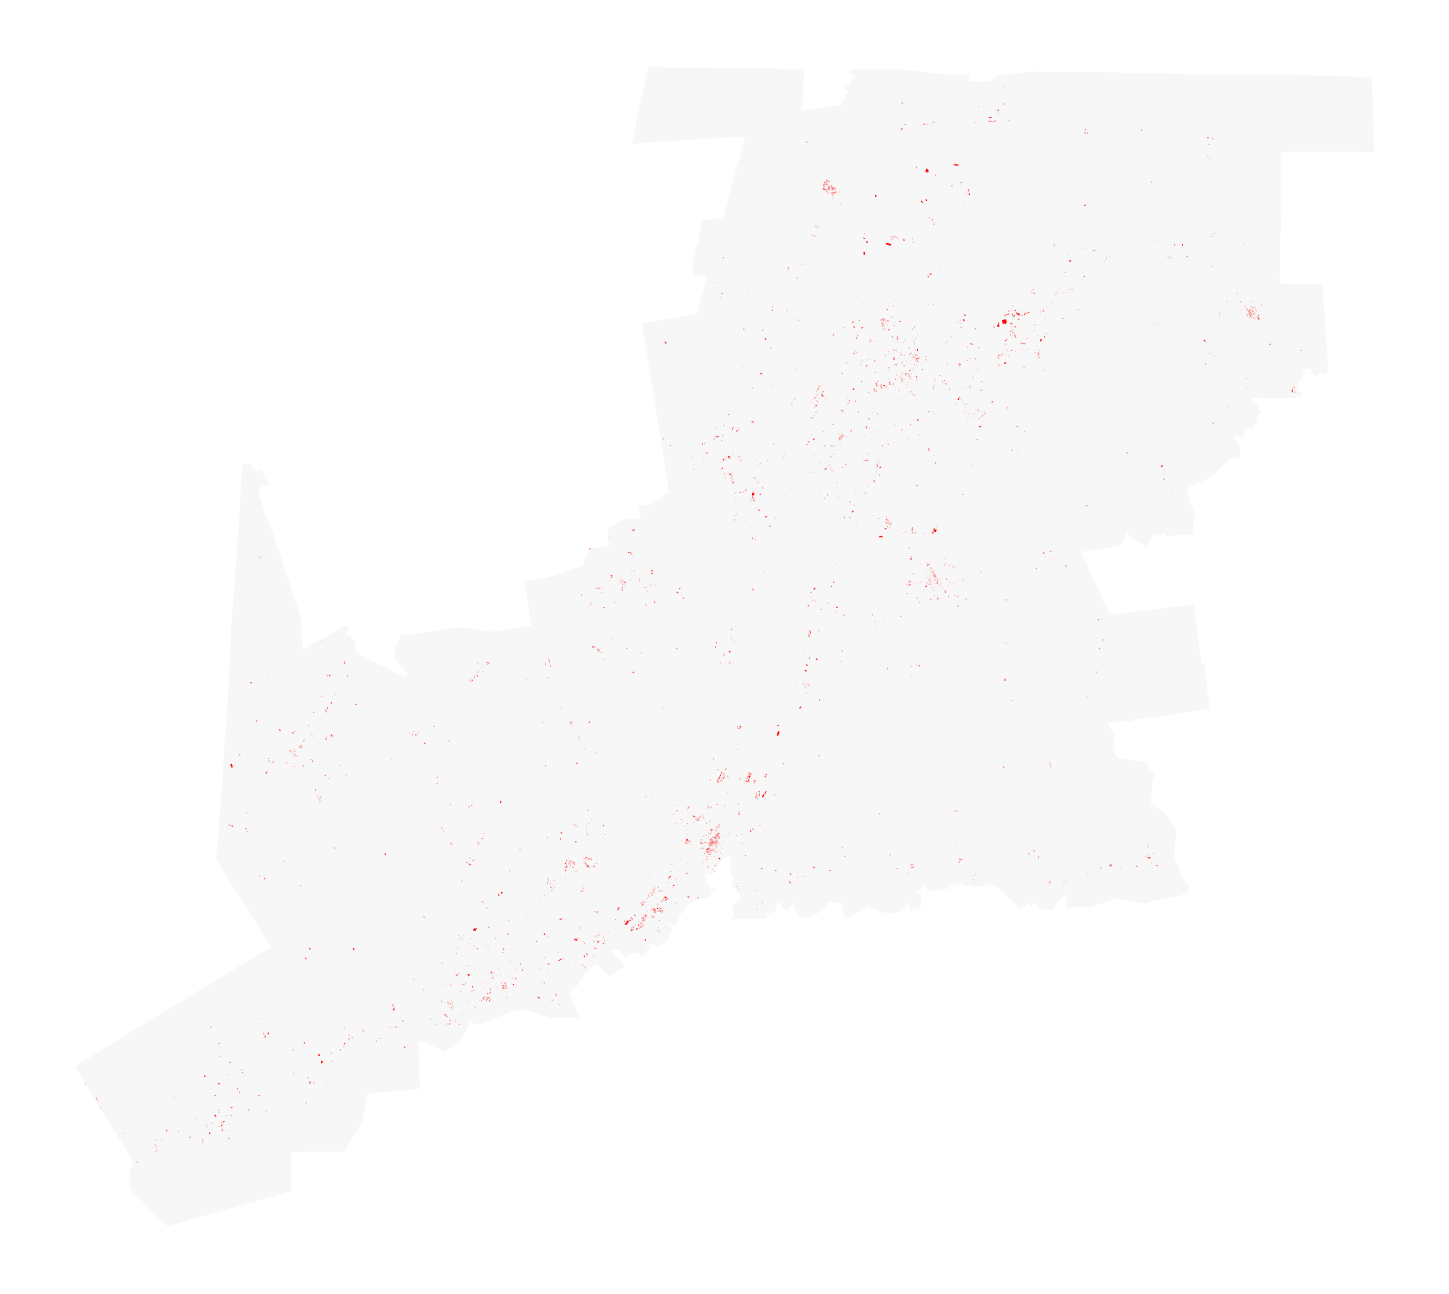

In [3]:
ct_counties = ['New Haven County, Connecticut, USA', 'Middlesex County, Connecticut, USA', 'Tolland County, Connecticut, USA', 
              'Hartford County, Connecticut, USA', 'Fairfield County, Connecticut, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
graph = ox.graph_from_place(ct_counties, network_type='drive')
area = ox.geocode_to_gdf(ct_counties)
bldgs = ox.geometries_from_place(ct_counties, tags={'building': desired_building_types})

fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
blgds_no_nodes = bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']
blgds_no_nodes.plot(ax=ax, facecolor='red', alpha=1)
plt.tight_layout()
ax.axis('off')

plt.savefig('../../../figures/footprint-msa.png', dpi=600,bbox_inches='tight')

In [4]:
def building_type_count(place_name, building_types):
    graph = ox.graph_from_place(place_name, network_type='all')
    area = ox.geocode_to_gdf(place_name)
    bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})

    # Use the correct variable name (bldgs) instead of bldgs_NewH
    unique_building_types = bldgs['building'].unique()

    # Use the correct variable name (bldgs) instead of bldgs_NewH
    building_type_counts = bldgs['building'].value_counts()

    # Iterate over the building types and counts
    for building_type, count in building_type_counts.items():
        print(f"{building_type}: {count} buildings")
        
    return building_type_counts

In [5]:
NewH = building_type_count(ct_NewH, desired_building_types)
Mids = building_type_count(ct_Mids, desired_building_types)
Tola = building_type_count(ct_Tola, desired_building_types)
Hart = building_type_count(ct_Hart, desired_building_types)
Fair = building_type_count(ct_Fair, desired_building_types)


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_15072\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


commercial: 507 buildings
garage: 358 buildings
university: 313 buildings
retail: 223 buildings
school: 208 buildings
church: 131 buildings
greenhouse: 126 buildings
service: 27 buildings
office: 23 buildings
farm_auxiliary: 17 buildings
dormitory: 15 buildings
hospital: 13 buildings
train_station: 13 buildings
hangar: 12 buildings
stadium: 11 buildings
warehouse: 10 buildings
hotel: 10 buildings
public: 9 buildings
college: 7 buildings
government: 6 buildings
kindergarten: 5 buildings
motel: 5 buildings
chapel: 3 buildings
library: 2 buildings
farm: 2 buildings
synagogue: 2 buildings
construction: 2 buildings
parish_hall: 1 buildings
sports_centre: 1 buildings
supermarket: 1 buildings
yes;commercial: 1 buildings
university;yes: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_15072\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


garage: 839 buildings
commercial: 180 buildings
retail: 95 buildings
university: 53 buildings
greenhouse: 50 buildings
school: 45 buildings
farm_auxiliary: 41 buildings
office: 37 buildings
church: 29 buildings
college: 21 buildings
hospital: 21 buildings
service: 17 buildings
hangar: 5 buildings
hotel: 5 buildings
warehouse: 4 buildings
train_station: 4 buildings
dormitory: 3 buildings
farm: 2 buildings
construction: 2 buildings
government: 2 buildings
chapel: 2 buildings
boathouse: 2 buildings
stadium: 1 buildings
fire_station: 1 buildings
sports_centre: 1 buildings
kiosk: 1 buildings
convent: 1 buildings
synagogue: 1 buildings
roof;commercial: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_15072\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


retail: 102 buildings
garage: 83 buildings
university: 74 buildings
dormitory: 52 buildings
school: 38 buildings
commercial: 30 buildings
church: 26 buildings
greenhouse: 21 buildings
public: 13 buildings
office: 10 buildings
farm_auxiliary: 9 buildings
government: 8 buildings
service: 6 buildings
hotel: 4 buildings
hospital: 2 buildings
kindergarten: 2 buildings
farm: 1 buildings
stadium: 1 buildings
chapel: 1 buildings
construction: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_15072\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


greenhouse: 461 buildings
retail: 402 buildings
garage: 374 buildings
commercial: 342 buildings
school: 282 buildings
church: 185 buildings
warehouse: 94 buildings
dormitory: 80 buildings
office: 76 buildings
university: 64 buildings
service: 58 buildings
hospital: 42 buildings
college: 32 buildings
hangar: 28 buildings
farm_auxiliary: 18 buildings
construction: 14 buildings
hotel: 12 buildings
stadium: 8 buildings
public: 6 buildings
kiosk: 5 buildings
kindergarten: 5 buildings
fire_station: 3 buildings
train_station: 2 buildings
sports_centre: 2 buildings
boathouse: 2 buildings
farm: 2 buildings
chapel: 1 buildings
napa auto parts: 1 buildings
museum: 1 buildings
store: 1 buildings
cathedral: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_15072\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


garage: 343 buildings
commercial: 299 buildings
school: 201 buildings
retail: 160 buildings
church: 80 buildings
office: 33 buildings
service: 27 buildings
hangar: 23 buildings
university: 22 buildings
train_station: 16 buildings
dormitory: 16 buildings
warehouse: 15 buildings
boathouse: 13 buildings
farm_auxiliary: 11 buildings
greenhouse: 11 buildings
hotel: 10 buildings
hospital: 6 buildings
kindergarten: 6 buildings
public: 5 buildings
construction: 3 buildings
chapel: 3 buildings
fire_station: 3 buildings
government: 2 buildings
college: 2 buildings
stadium: 2 buildings
mosque: 2 buildings
kiosk: 2 buildings
plant_nursery: 1 buildings
clubhouse: 1 buildings
farm: 1 buildings
dome: 1 buildings
sports_centre: 1 buildings


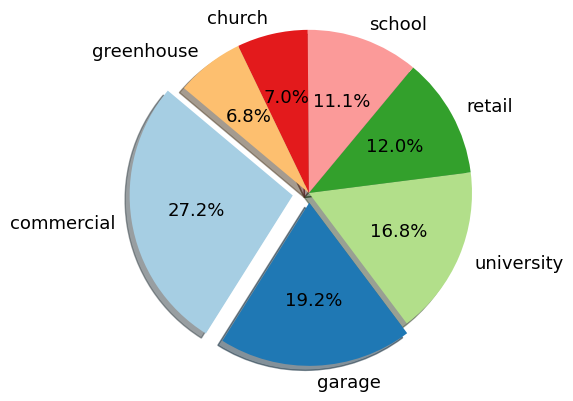

In [6]:
def plot_pie_chart(building_type_counts):
    labels = building_type_counts.index[:7]
    sizes = building_type_counts[labels].values

    # Choose a color palette
    colors = plt.cm.Paired(range(len(labels)))
       # Explode the first slice (optional)
    explode = (0.1, 0.06, 0, 0, 0, 0, 0)


    # Add shadow and set aspect ratio
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True,textprops={'fontsize': 13})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
     # Explode the first slice (optional)
    #explode = (0.1, 0.06, 0, 0, 0, 0, 0)

    # Increase figure size

    # Add shadow and set aspect ratio
    #plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sizes) / 100),
            #startangle=140, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 10})
        
    #plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p),
            #startangle=140, colors=colors, explode=explode, shadow=True,
            #textprops={'fontsize': 10}, pctdistance=1.2)



    # Uncomment the title line (optional)
    # plt.title('Building Types Distribution')

    # Add a legend (optional)
    #legend_x, legend_y = 0.9, 0.0
    #plt.legend(labels, loc=(legend_x, legend_y))

    #plt.show()
    


# Plot pie chart
plot_pie_chart(NewH)
plt.savefig('../../../figures/NewHaven-commercial-building.png', dpi=600,bbox_inches='tight')

In [7]:
hartford_msa = pd.concat([Tola, Mids, Hart], axis=1).sum(axis=1)


In [8]:
type(hartford_msa)

pandas.core.series.Series

In [9]:
hartford_msa = hartford_msa.sort_values(ascending=False)
hartford_msa

building
garage             1296.0
retail              599.0
commercial          552.0
greenhouse          532.0
school              365.0
church              240.0
university          191.0
dormitory           135.0
office              123.0
warehouse            98.0
service              81.0
farm_auxiliary       68.0
hospital             65.0
college              53.0
hangar               33.0
hotel                21.0
public               19.0
construction         17.0
stadium              10.0
government           10.0
kindergarten          7.0
train_station         6.0
kiosk                 6.0
farm                  5.0
chapel                4.0
boathouse             4.0
fire_station          4.0
sports_centre         3.0
convent               1.0
synagogue             1.0
roof;commercial       1.0
napa auto parts       1.0
museum                1.0
store                 1.0
cathedral             1.0
dtype: float64

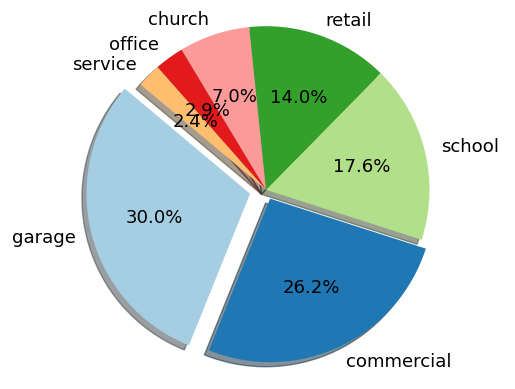

In [10]:
plot_pie_chart(Fair)
plt.savefig('../../../figures/Report-images/fairfield-commercial-building.png', dpi=600,bbox_inches='tight')

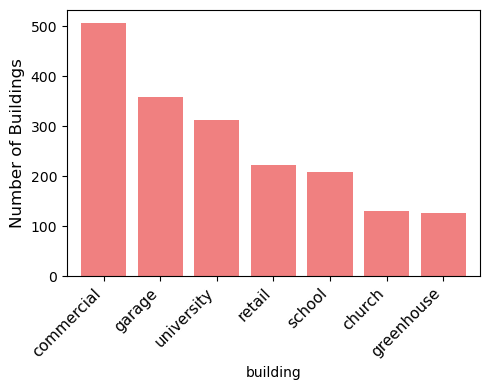

In [11]:
def plot_bar_chart(building_type_counts,color):
    #labels = building_type_counts.index[:7]
    #sizes = building_type_counts[labels].values

    plt.figure(figsize=(5, 4))
    building_type_counts.iloc[:7].plot(kind='bar', color=color,width=0.8)
    #plt.xlabel('Building Types')
    plt.ylabel('Number of Buildings',fontsize=12)
    #plt.title('Number of Buildings by Type')
    plt.xticks(rotation=45, ha='right',fontsize=11)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    #plt.show()
    
     
    


# Plot pie chart
plot_bar_chart(NewH,'lightcoral')
plt.savefig('../../../figures/Report-images/NewHaven-commercial-building-number.png', dpi=600,bbox_inches='tight')

In [12]:
def plot_bar_chart(building_type_counts, color):
    # Determine the maximum value among all datasets


    plt.figure(figsize=(5, 4))
    building_type_counts.iloc[:7].plot(kind='bar', color=color, width=0.8)

    # Set the same y-axis limits for all plots
    plt.ylim(0, 1400)  # You can adjust the additional value as needed for spacing

    plt.ylabel('Number of Buildings', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.tight_layout()
    #plt.show()

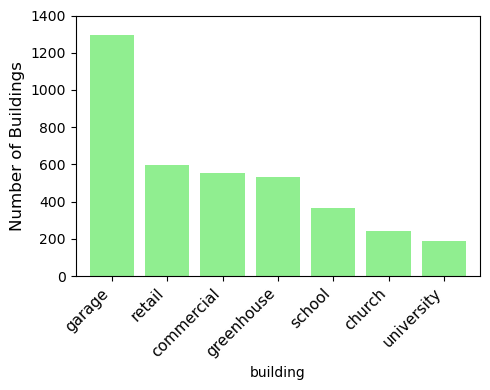

In [13]:
plot_bar_chart(hartford_msa,'lightgreen')
plt.savefig('../../../figures/Report-images/Hartford-commercial-building-number.png', dpi=600,bbox_inches='tight')

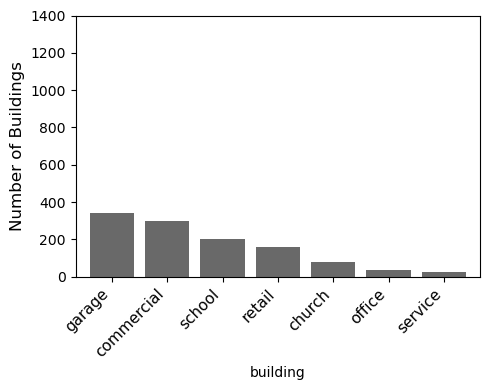

In [14]:
plot_bar_chart(Fair,'dimgray')
plt.savefig('../../../figures/Report-images/fairfield-commercial-building-number.png', dpi=600,bbox_inches='tight')

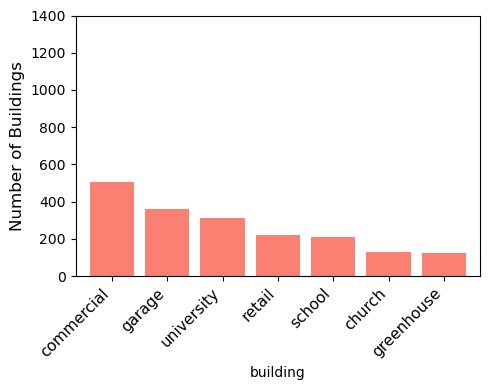

In [15]:
plot_bar_chart(NewH,'salmon')
plt.savefig('../../../figures/Report-images/HewHaven-commercial-building-number.png', dpi=600,bbox_inches='tight')

In [26]:
def footprint_graph(place_name, building_types):
    graph = ox.graph_from_place(place_name, network_type='all')
    area = ox.geocode_to_gdf(place_name)
    bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})

    fig, ax = plt.subplots(figsize=(5,5))
    area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
    bldgs_no_nodes = bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']
    bldgs_no_nodes.plot(ax=ax, facecolor='red', alpha=1)
    plt.tight_layout()
    ax.axis('off')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19636\2423382039.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


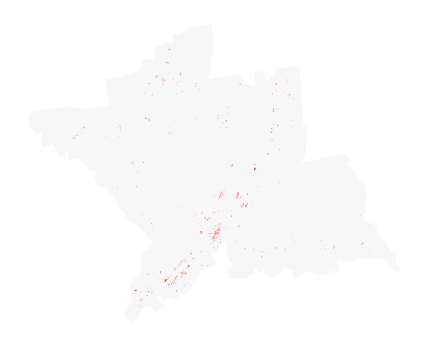

In [27]:
footprint_graph(ct_NewH, desired_building_types)
plt.savefig('../../../figures/Report-images/footprint-NewH.png', bbox_inches='tight')

In [28]:
ct_NewH

['New Haven County, Connecticut, USA']

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19636\2423382039.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


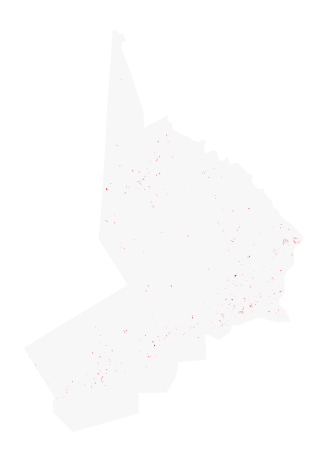

In [29]:
footprint_graph(ct_Fair, desired_building_types)
plt.savefig('../../../figures/Report-images/footprint-Fair.png', bbox_inches='tight')

In [30]:
def footprint_squarefeet(place_name, building_types):
    graph = ox.graph_from_place(place_name, network_type='all')
    area = ox.geocode_to_gdf(place_name)
    bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})

    building_geometries_series = gpd.GeoSeries(bldgs.geometry)
    total_footprint_area = building_geometries_series.area.sum()
    projected_crs = 'EPSG:6433'
    building_geometries_projected = bldgs.to_crs(projected_crs)
    total_footprint_area_projected = building_geometries_projected.area.sum()
    
    #print("Total Building Footprint Area:", total_footprint_area)
    #print("Total Building Footprint Area (Projected):", total_footprint_area_projected) #square feet
    return total_footprint_area_projected

In [31]:
#ct = footprint_squarefeet(ct, desired_building_types)
ct = footprint_squarefeet(ct, desired_building_types)
NewH = footprint_squarefeet(ct_NewH, desired_building_types)
Mids = footprint_squarefeet(ct_Mids, desired_building_types)
Tola = footprint_squarefeet(ct_Tola, desired_building_types)
Hart = footprint_squarefeet(ct_Hart, desired_building_types)+footprint_squarefeet(lyme, desired_building_types)+footprint_squarefeet(Oldlyme, desired_building_types)+footprint_squarefeet(Colchester, desired_building_types)
Fair = footprint_squarefeet(ct_Fair, desired_building_types)+footprint_squarefeet(NewMilford, desired_building_types)+footprint_squarefeet(Bridgewater, desired_building_types)

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19636\4126494917.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19636\4126494917.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_footprint_area = building_geometries_series.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19636\4126494917.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and funct

In [32]:

footprint = pd.DataFrame({
        'County': ['New Haven','Hartford','Middlesex','Tolland','Fairfield'],
        'Total Footprint Area (Projected)': [NewH,Hart,Mids,Tola,Fair]
    })

In [33]:
footprint 

,County,Total Footprint Area (Projected)
0,New Haven,4.021517e+06
1,Hartford,4.904064e+06
2,Middlesex,1.139099e+06
3,Tolland,6.902327e+05
4,Fairfield,3.061254e+06


In [34]:
ct = footprint_squarefeet(ct, desired_building_types)

TypeError: query must be dict, string, or list of strings

In [35]:
footprint = pd.DataFrame({
        'County': ['New Haven','Hartford','Middlesex','Tolland','Fairfield','Statewide'],
        'Total Footprint Area (square feet)': [NewH,Hart,Mids,Tola,Fair,ct]
    })

In [36]:
footprint['Ratio'] = footprint['Total Footprint Area (square feet)']/ct


In [37]:
footprint

,County,Total Footprint Area (square feet),Ratio
0,New Haven,4.021517e+06,0.249936
1,Hartford,4.904064e+06,0.304786
2,Middlesex,1.139099e+06,0.070795
3,Tolland,6.902327e+05,0.042898
4,Fairfield,3.061254e+06,0.190256
5,Statewide,1.609018e+07,1.000000


In [38]:
import pandas as pd
ct_emissions = pd.read_excel('../../../data/raw/Public GHG data 1990-2021.xlsx', sheet_name="Emission Totals")

In [39]:
ct_emissions

,Sector Emissions (MMTCO2e),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020,2021 (ESTIMATE),2021 % of Total Emissions,% change from 1990,% change from last year,% change from 2001
0,Agriculture,0.375261,0.348502,0.389088,0.415000,0.408122,0.400748,0.344938,0.348057,0.375380,...,0.339883,0.341291,0.350344,0.369979,0.346028,0.350000,0.010075,-0.067316,0.011480,-0.062704
1,Natural Gas Leakage,0.794155,0.762277,0.747679,0.720340,0.695204,0.668485,0.638662,0.614303,0.588198,...,0.245919,0.243363,0.240438,0.241217,0.240000,0.240000,0.006909,-0.697792,0.000000,-0.532010
2,Commercial,3.828568,3.662331,4.312955,3.843474,4.172272,3.841800,4.133427,4.301810,4.036593,...,3.907677,3.920870,4.329612,4.196598,3.824505,4.001450,0.115189,0.045156,0.046266,-0.073598
3,Commercial (CO2FFC),3.802622,3.636449,4.283215,3.814070,4.142831,3.813977,4.103763,4.273123,4.010713,...,3.885436,3.898378,4.306234,4.173702,3.803173,3.979450,0.114555,0.046502,0.046350,-0.072990
4,Commercial (Stationary),0.025946,0.025882,0.029740,0.029404,0.029441,0.027823,0.029664,0.028687,0.025880,...,0.022242,0.022492,0.023378,0.022896,0.021332,0.022000,0.000633,-0.152093,0.031333,-0.171856
5,Electric Power (Consumption),11.908703,12.015808,11.282676,10.228667,10.395885,10.320433,10.734700,13.201970,12.948870,...,9.289161,8.501146,8.066976,5.690000,3.200000,3.040000,0.087512,-0.744725,-0.050000,-0.753715
6,Electric Power (Generation),12.125818,11.775872,9.771757,8.650563,8.513378,9.737109,11.311067,14.507413,13.348240,...,8.574717,7.866282,9.589895,9.523774,10.206000,10.955000,0.315358,-0.096556,0.073388,-0.040398
7,CO2 (EIA State Energy Profile),12.084447,11.736217,9.738805,8.621568,8.485521,9.707468,11.276329,14.462553,13.308563,...,8.558718,7.854365,9.574281,9.510000,10.186000,10.940000,0.314926,-0.094704,0.074023,-0.038865
8,CH4 and N2O (Stationary),0.041371,0.039655,0.032952,0.028995,0.027857,0.029641,0.034738,0.044860,0.039677,...,0.015998,0.011917,0.015615,0.013774,0.020000,0.015000,0.000432,-0.637431,-0.250000,-0.556474
9,Industrial,3.001041,3.100758,3.355918,3.447719,3.150548,3.103303,3.257568,3.266450,3.119599,...,3.152446,3.123419,3.137983,3.146549,3.128899,3.376378,0.097195,0.125069,0.079094,0.011279


In [64]:
emi = 3.82

In [65]:
footprint['GHG Emissions/MMTCO2e'] = footprint['Ratio']*emi

In [66]:
footprint

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven,4.021517e+06,0.249936,0.954756
1,Hartford,4.904064e+06,0.304786,1.164283
2,Middlesex,1.139099e+06,0.070795,0.270436
3,Tolland,6.902327e+05,0.042898,0.163869
4,Fairfield,3.061254e+06,0.190256,0.726778
5,Statewide,1.609018e+07,1.000000,3.820000


In [67]:
# Choose the rows you want to sum
rows_to_sum = [1, 2, 3]

# Calculate the sum of the selected rows
sum_result = footprint.iloc[rows_to_sum].sum()


In [68]:
sum_result

County                                HartfordMiddlesexTolland
Total Footprint Area (square feet)              6733395.210624
Ratio                                                 0.418479
GHG Emissions/MMTCO2e                                 1.598588
dtype: object

In [69]:
newH_footprint = footprint.iloc[0]
Fair_footprint = footprint.iloc[4]
state_footprint = footprint.iloc[5]

In [70]:
# Choose two rows by label (index)
rows_to_extract = [0, 4,5]

# Extract the selected rows into a new DataFrame
footprint_msa = footprint.loc[rows_to_extract].copy()

# Remove the selected rows from the original DataFrame
#footprint_msa = footprint.drop(rows_to_extract)

In [71]:
footprint_msa

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven,4.021517e+06,0.249936,0.954756
4,Fairfield,3.061254e+06,0.190256,0.726778
5,Statewide,1.609018e+07,1.000000,3.820000


In [72]:
position_to_add = 2

# Concatenate the DataFrame before and after the new row
footprint_msa = pd.concat([footprint_msa.iloc[:position_to_add], pd.DataFrame([sum_result]), footprint_msa.iloc[position_to_add:]]).reset_index(drop=True)

In [73]:
footprint_msa

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven,4.021517e+06,0.249936,0.954756
1,Fairfield,3.061254e+06,0.190256,0.726778
2,HartfordMiddlesexTolland,6.733395e+06,0.418479,1.598588
3,Statewide,1.609018e+07,1.000000,3.820000


In [74]:
footprint_msa.loc[0, 'County'] = 'New Haven-Milford'
footprint_msa.loc[1, 'County'] = 'Bridgeport-Stamford-Norwalk'
footprint_msa.loc[2, 'County'] = 'Hartford-East Hartford-Middletown'


In [75]:
footprint_msa

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven-Milford,4.021517e+06,0.249936,0.954756
1,Bridgeport-Stamford-Norwalk,3.061254e+06,0.190256,0.726778
2,Hartford-East Hartford-Middletown,6.733395e+06,0.418479,1.598588
3,Statewide,1.609018e+07,1.000000,3.820000


In [76]:
new_row = {
    'County': 'Rest of the state',
    'Total Footprint Area (square feet)': footprint_msa.iloc[3]['Total Footprint Area (square feet)'] - footprint_msa.iloc[:3]['Total Footprint Area (square feet)'].sum(),
    'Ratio': footprint_msa.iloc[3]['Ratio'] - footprint_msa.iloc[:3]['Ratio'].sum(),
    'GHG Emissions/MMTCO2e': footprint_msa.iloc[3]['GHG Emissions/MMTCO2e'] - footprint_msa.iloc[:3]['GHG Emissions/MMTCO2e'].sum()
}

footprint_msa = pd.concat([footprint_msa.iloc[:3], pd.DataFrame([new_row]), footprint_msa.iloc[3:]]).reset_index(drop=True)
footprint_msa 

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven-Milford,4.021517e+06,0.249936,0.954756
1,Bridgeport-Stamford-Norwalk,3.061254e+06,0.190256,0.726778
2,Hartford-East Hartford-Middletown,6.733395e+06,0.418479,1.598588
3,Rest of the state,2.274012e+06,0.141329,0.539877
4,Statewide,1.609018e+07,1.000000,3.820000


In [77]:
msa = footprint_msa.iloc[0:3,0]
values = footprint_msa.iloc[0:3,-1]
Footprint_ratio = footprint_msa.iloc[0:4,2]
categories = footprint_msa.iloc[0:4,1]

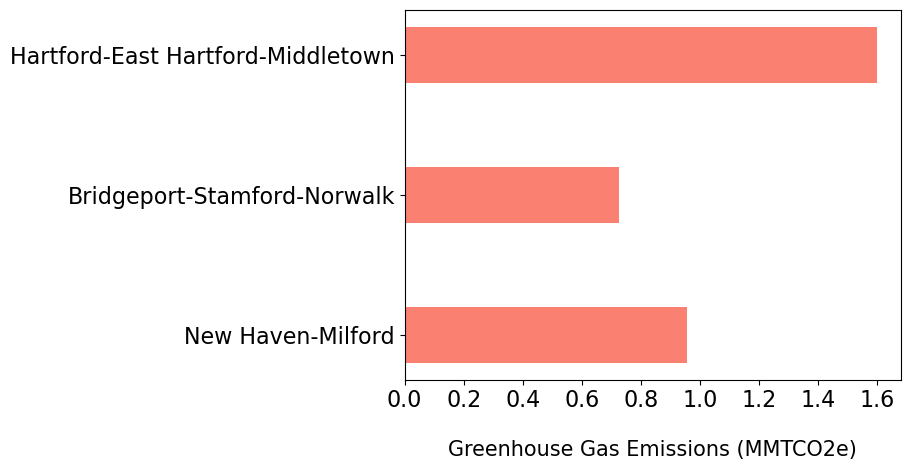

In [78]:
plt.barh(msa, values, 0.4, color="salmon")
plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)

plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)

#plt.show() 

plt.savefig('../../../figures/Report-images/commercial-emissions.png', dpi=600,bbox_inches='tight')

ValueError: 'label' must be of length 'x'

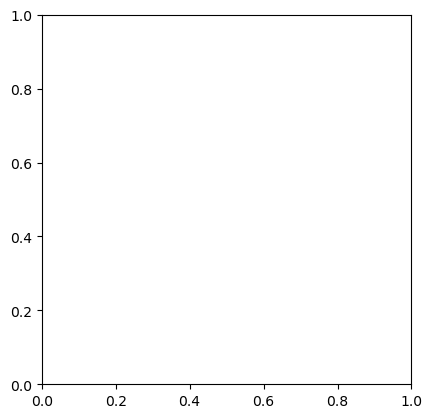

In [79]:
pie_chart = plt.pie(Footprint_ratio, labels=msa, autopct='%1.1f%%', startangle=90, textprops={'size': 14})

# Set font size for pie chart labels
for label in pie_chart[1]:
    label.set_fontsize(12)
    
plt.savefig('../../../figures/Report-images/footprint_ratio.png', dpi=600,bbox_inches='tight')